# Permutation importance and XPER for blackbox model

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import joblib

## Load data from ../Dataset

In [2]:
df = pd.read_csv('../Dataset/df_processed.csv')

In [3]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,School_Bus,WklyStudyHours,Grade
0,female,group C,bachelor's degree,standard,0,married,regularly,1,3,1,Less than 5 hours,0
1,female,group C,some college,standard,0,married,sometimes,1,0,1,Between 5-10 hours,1
2,female,group B,master's degree,standard,0,single,sometimes,1,4,1,Less than 5 hours,1
3,male,group A,associate's degree,free/reduced,0,married,never,0,1,1,Between 5-10 hours,0
4,male,group C,some college,standard,0,married,sometimes,1,0,1,Between 5-10 hours,0


## Split data

In [4]:
# Create label and features
X = df.drop('Grade', axis=1)
y = df['Grade']

In [5]:
# Create train, test, and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Load blackbox model

In [6]:
# Load the model from the file
model_filename = '../Models/blackbox_model.pkl'
model = joblib.load(model_filename)

## Permutation importance

In [7]:
# Calculate permutation importances using sklearn's permutation_importance
result = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=0)

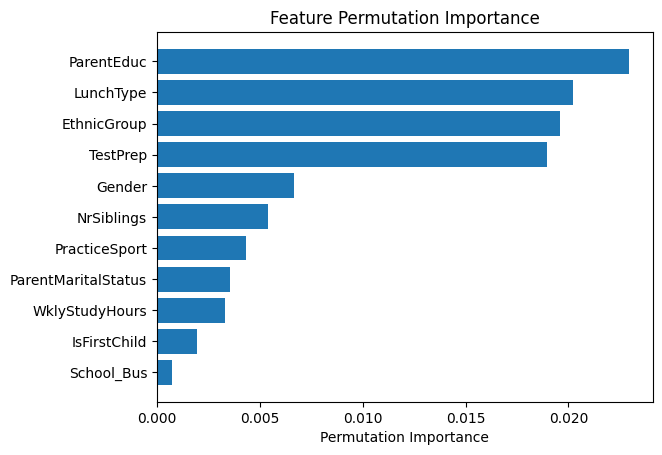

In [8]:
# Plot the feature importances
sorted_idx = result.importances_mean.argsort()
plt.barh(X_test.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Permutation Importance')
plt.show()

## XPER

In [13]:
import XPER
from XPER.compute.Performance import ModelPerformance

In [14]:
# Define the evaluation metric(s) to be used
XPER = ModelPerformance(X_train, y_train, X_test, y_test, model)

# Evaluate the model performance using the specified metric(s)
PM = XPER.evaluate(["AUC"])

# Print the performance metrics
print("Performance Metrics: ", round(PM, 3))

Performance Metrics:  0.762


In [15]:
XPER_values = XPER.calculate_XPER_values(["AUC"])

Performing Computation:   0%|          | 0/1 [00:00<?, ?it/s]

Sadly XPER won't run because it is too heavy for our dataset and local computation capabilities.